# NLP TRAINING

## JEAN-BAPTISTE BERRY

### MS EBAM - Université de Technologie de Troyes


### Libraries

In [5]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import nltk

### Data

##### Le premier fichier labeledTrainData.tsv contient 25 000 revues de films IMDB. À chacune, on associe un sentiment. Ici, "header = 0" précise que la première ligne du fichier contient le nom des colonnes, "delimiter=\t" précise que les champs sont séparés par des tabulations et "quoting=3" précise à python qu'il faut ignorer les " sinon on pourrait rencontrer des erreurs en essayant de lire le fichier.

In [6]:
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

##### On vérifie qu'on a bien 25 000 lignes et 3 colonnes comme suivant 

In [7]:
train.shape

(25000, 3)

In [8]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

##### les 3 colonnes sont : "id", "sentiment" et "review"

##### Maintenant qu'on s'est informé sur notre training set, on peut jetter un coup d'oeil à quelques reviews :

### see first row

In [9]:
print(train["review"][0][:65])
print(train["review"][1][:65])
print(train["review"][2][:65])
print(train["review"][3][:65])
print(train["review"][4][:65])
print(train["review"][5][:65])
print(train["review"][6][:65])
print(train["review"][7][:65])
print(train["review"][8][:65])
print(train["review"][9][:65])
print(train["review"][10][:65])

"With all this stuff going down at the moment with MJ i've starte
"\"The Classic War of the Worlds\" by Timothy Hines is a very ent
"The film starts with a manager (Nicholas Bell) giving welcome in
"It must be assumed that those who praised this film (\"the great
"Superbly trashy and wondrously unpretentious 80's exploitation, 
"I dont know why people think this is such a bad movie. Its got a
"This movie could have been very good, but comes up way short. Ch
"I watched this video at a friend's house. I'm glad I did not was
"A friend of mine bought this film for £1, and even then it was g
"<br /><br />This movie is full of references. Like \"Mad Max II\
"What happens when an army of wetbacks, towelheads, and Godless E


In [10]:
print(train["sentiment"][0])
print(train["sentiment"][1])
print(train["sentiment"][2])
print(train["sentiment"][3])
print(train["sentiment"][4])
print(train["sentiment"][5])
print(train["sentiment"][6])
print(train["sentiment"][7])
print(train["sentiment"][8])
print(train["sentiment"][9])
print(train["sentiment"][10])

1
1
0
0
1
1
0
0
0
1
0


In [11]:
print(train["id"][0])
print(train["id"][1])
print(train["id"][2])
print(train["id"][3])
print(train["id"][4])
print(train["id"][5])
print(train["id"][6])
print(train["id"][7])
print(train["id"][8])
print(train["id"][9])
print(train["id"][10])

"5814_8"
"2381_9"
"7759_3"
"3630_4"
"9495_8"
"8196_8"
"7166_2"
"10633_1"
"319_1"
"8713_10"
"2486_3"


### Feature Engineering

In [42]:
from nltk.text import Text  
from nltk import word_tokenize

for i in range(0,5):
    jb = train["review"][i]


    tokens = word_tokenize(jb)
    #type(tokens)
    #len(tokens)
    #tokens[:10]
    text = nltk.Text(tokens)
    #type(text)
    #text[10:20]
    text.concordance("a")
    print("\n\n")



Displaying 10 of 10 matches:
alker again . Maybe i just want to get a certain insight into this guy who i th
equence and Joe Pesci is convincing as a psychopathic all powerful drug lord . 
ol things in this like MJ turning into a car and a robot and the whole Speed De
in this like MJ turning into a car and a robot and the whole Speed Demon sequen
director must have had the patience of a saint when it came to filming the kidd
rs hate working with one kid let alone a whole bunch of them performing a compl
alone a whole bunch of them performing a complex dance scene. < br / > < br / >
n stay away . It does try and give off a wholesome message and ironically MJ 's
y MJ 's bestest buddy in this movie is a girl ! Michael Jackson is truly one of
 behind closed doors , i know this for a fact . He is either an extremely nice 



Displaying 3 of 3 matches:
                                       a very entertaining film that obviously 
everyone looks for different things in a movie . Those who en

In [53]:
jb = train["review"][0]
tokens = word_tokenize(jb)
text = nltk.Text(tokens)
jb

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [82]:
text.similar("hate")

grace


In [86]:
for i in range(0,10):
    jb = train["review"][i]


    tokens = word_tokenize(jb)
    #type(tokens)
    #len(tokens)
    #tokens[:10]
    text = nltk.Text(tokens)
    #type(text)
    #text[10:20]
    
    print("text",i,":",len(text))
    #len(text3)


text 0 : 499
text 1 : 193
text 2 : 438
text 3 : 464
text 4 : 426
text 5 : 101
text 6 : 130
text 7 : 153
text 8 : 196
text 9 : 65


In [91]:
jb
sorted(set(text))

["''",
 '(',
 ')',
 ',',
 '.',
 '/',
 '<',
 '>',
 'II\\',
 'Like',
 'Lorre',
 'Mad',
 'Max',
 'Peter',
 'The',
 'This',
 'We´ll',
 '\\',
 '``',
 'a',
 'about',
 'and',
 'br',
 'clear',
 'face',
 'full',
 'future',
 'in',
 'is',
 'it´s',
 'ladybug´s',
 'many',
 'masterpiece',
 'more',
 'movie',
 'much',
 'of',
 'one\\',
 'or',
 'others',
 'reference',
 'references',
 'talk',
 'the',
 'to',
 'tribute',
 'wild']

In [92]:
for i in range(0,10):
    jb = train["review"][i]


    tokens = word_tokenize(jb)
    #type(tokens)
    #len(tokens)
    #tokens[:10]
    text = nltk.Text(tokens)
    #type(text)
    #text[10:20]
    
    print("text",i,":",len(text)/len(set(text)))
    #len(text3)


text 0 : 1.9723320158102766
text 1 : 1.6083333333333334
text 2 : 1.5985401459854014
text 3 : 1.9414225941422594
text 4 : 1.6015037593984962
text 5 : 1.4852941176470589
text 6 : 1.5116279069767442
text 7 : 1.5454545454545454
text 8 : 1.5806451612903225
text 9 : 1.3829787234042554


#### For text 0, each word is used 1.97 times on average.

In [99]:
100 * text.count('This') /len(text)

3.076923076923077

#### approximatively 3 % of the text is taken by the word This.

In [96]:
jb = train["review"][9]
jb

'"<br /><br />This movie is full of references. Like \\"Mad Max II\\", \\"The wild one\\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."'

In [103]:
def lexical_diversity(text):
    return len(text) / len(set(text))

def percentage(count, total):
    return 100 * count / total

lexical_diversity(text)
percentage(text.count('This') ,len(text))

3.076923076923077

In [104]:
text[34]

'The'

In [106]:
text.index('The')

26

In [107]:
vocab = set(text)
vocab_size = len(vocab)
vocab_size


47

#### Frequency Distributions

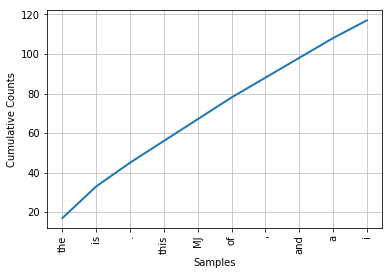

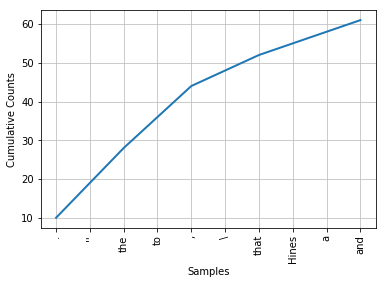

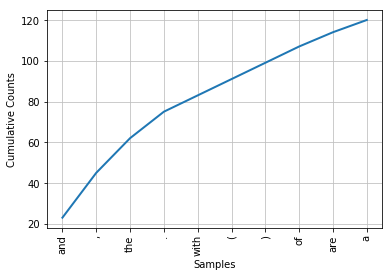

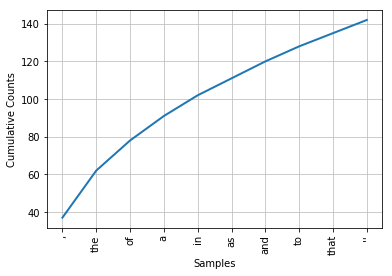

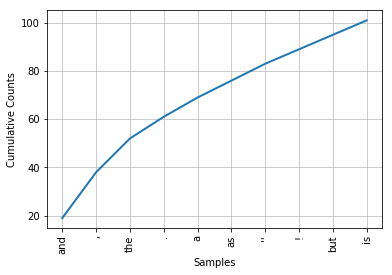

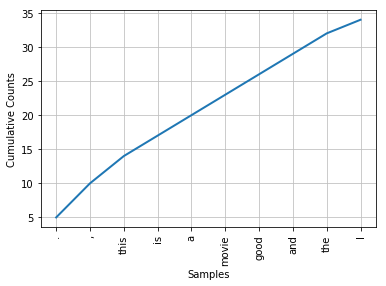

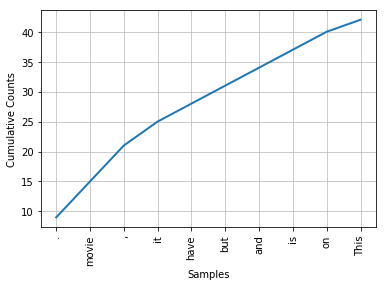

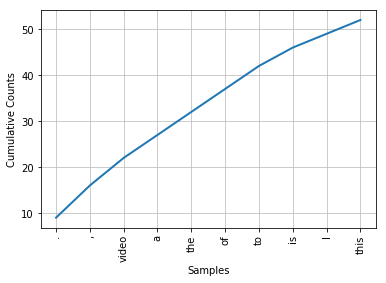

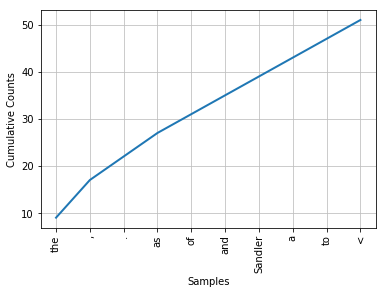

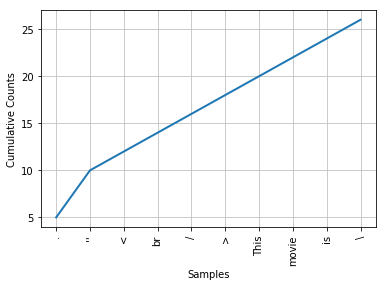

In [135]:
from nltk import FreqDist

for i in range(0,10):
    jb = train["review"][i]
    tokens = word_tokenize(jb)
    #type(tokens)
    #len(tokens)
    #tokens[:10]
    text = nltk.Text(tokens)
    fdist1 = FreqDist(text) 
    vocabulary1 = fdist1.keys() 
    fdist1.plot(10, cumulative=True)
    #print(fdist1.hapaxes())
    #print(fdist1['the'])
    #print(vocabulary1,"\n")
    
    #len(text3)


In [151]:
for i in range(0,10):
    jb = train["review"][i]
    tokens = word_tokenize(jb)
    #type(tokens)
    #len(tokens)
    #tokens[:10]
    text = nltk.Text(tokens)
    V = set(text)
    long_words = [w for w in V if len(w) > 10]
    print(sorted(long_words),"\n")
    #print(fdist1.hapaxes())
    #print(fdist1['the'])
    #print(vocabulary1,"\n")



    #len(text3)

['documentary', 'psychopathic'] 

['appreciated', 'entertained', 'entertaining', 'predictable', 'resemblance', 'shortcomings'] 

['Furthermore', 'Sabretooths', 'appropriately', 'carnivorous', 'effects.The', 'entertainment', 'food.Actors', 'hair-raising', 'occasionally', 'originality', 'performances', 'pre-historical', 'scientific.Meanwhile', 'terrifyingly', '¨Sabretooth'] 

['Knappertsbusch', 'Shakespeare', 'fashionably', 'imperfections', 'integration', 'justification', 'monstrously', 'questionable', 'realisation', 'representation', 'represented', 'transcendant', 'unmitigated'] 

['appropriate', 'attractions', 'coincidentally', 'exploitation', 'fist-fights', 'magnificently', 'nonsensical', 'pre-credits', 'preposterous', 'prostitutes', 'relationship', 'replacement', 'slaughtered', 'unpretentious', "we're-falling-in-love\\"] 

[] 

['Christopher'] 

['photography'] 

['consistently', 'shamelessly', 'unfathomable'] 

['masterpiece'] 



In [149]:
#noticed for a length superior of 15


jb = train["review"][2]
tokens = word_tokenize(jb)
text = nltk.Text(tokens)

for i in range(len(text)):
    if '.' in text[i]:
        print(text[i])

.
.
scientific.Meanwhile
.
.
.
.
victims.
effects.The
.The
.Middling
food.Actors
.
.
.
¨10.000
.
.
.
.


In [157]:
for i in range(0,10):
    jb = train["review"][i]
    tokens = word_tokenize(jb)
    #type(tokens)
    #len(tokens)
    #tokens[:10]
    text = nltk.Text(tokens)
    fdist = FreqDist(text)
    V = set(text)
    long_words = [w for w in V if len(w) > 2 and fdist[w] > 7]
    print(sorted(long_words),"\n")
    #print(fdist1.hapaxes())
    #print(fdist1['the'])
    #print(vocabulary1,"\n")



    #len(text3)

['and', 'the', 'this'] 

['the'] 

['and', 'the', 'with'] 

['and', 'the'] 

['and', 'the'] 

[] 

[] 

[] 

['the'] 

[] 



In [177]:
from nltk import bigrams, collocations


jb = train["review"][0]
tokens = word_tokenize(jb)
text = nltk.Text(tokens)
#print(tokens)
#list(bigrams(tokens))
text.collocations()

Joe Pesci; Michael Jackson; feature film


In [193]:
#[len(w) for w in text] 
fdist = FreqDist([len(w) for w in text]) 
#fdist
#fdist.keys()
fdist.items()
fdist.max()
fdist[2]
fdist.freq(2)

0.2124248496993988

In [194]:
 [w.upper() for w in text]


['``',
 'WITH',
 'ALL',
 'THIS',
 'STUFF',
 'GOING',
 'DOWN',
 'AT',
 'THE',
 'MOMENT',
 'WITH',
 'MJ',
 'I',
 "'VE",
 'STARTED',
 'LISTENING',
 'TO',
 'HIS',
 'MUSIC',
 ',',
 'WATCHING',
 'THE',
 'ODD',
 'DOCUMENTARY',
 'HERE',
 'AND',
 'THERE',
 ',',
 'WATCHED',
 'THE',
 'WIZ',
 'AND',
 'WATCHED',
 'MOONWALKER',
 'AGAIN',
 '.',
 'MAYBE',
 'I',
 'JUST',
 'WANT',
 'TO',
 'GET',
 'A',
 'CERTAIN',
 'INSIGHT',
 'INTO',
 'THIS',
 'GUY',
 'WHO',
 'I',
 'THOUGHT',
 'WAS',
 'REALLY',
 'COOL',
 'IN',
 'THE',
 'EIGHTIES',
 'JUST',
 'TO',
 'MAYBE',
 'MAKE',
 'UP',
 'MY',
 'MIND',
 'WHETHER',
 'HE',
 'IS',
 'GUILTY',
 'OR',
 'INNOCENT',
 '.',
 'MOONWALKER',
 'IS',
 'PART',
 'BIOGRAPHY',
 ',',
 'PART',
 'FEATURE',
 'FILM',
 'WHICH',
 'I',
 'REMEMBER',
 'GOING',
 'TO',
 'SEE',
 'AT',
 'THE',
 'CINEMA',
 'WHEN',
 'IT',
 'WAS',
 'ORIGINALLY',
 'RELEASED',
 '.',
 'SOME',
 'OF',
 'IT',
 'HAS',
 'SUBTLE',
 'MESSAGES',
 'ABOUT',
 'MJ',
 "'S",
 'FEELING',
 'TOWARDS',
 'THE',
 'PRESS',
 'AND',
 'ALSO',
 'T

In [197]:
 def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = word_count / vocab_size
    return diversity_score

lexical_diversity(text)

1.9723320158102766

In [202]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

unusual_words(tokens)
#unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['bestest',
 'br',
 'directors',
 'doors',
 'drugs',
 'dunno',
 'eighties',
 'etc',
 'fans',
 'filming',
 'has',
 'hates',
 'kid',
 'liars',
 'messages',
 'minutes',
 'mj',
 'nah',
 'overheard',
 'performing',
 'pesci',
 'plans',
 'ranted',
 'released',
 'sickest',
 'started',
 'starts',
 'supplying',
 'things',
 'wanted',
 'wants']

#### Removing the stop words

In [203]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

###### Let’s define a function to compute what fraction of words in a text are not in the stopwords


In [204]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

content_fraction(text)

0.5811623246492986

In [206]:
from nltk.corpus import swadesh
swadesh.fileids()
swadesh.words('en')
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [208]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print (swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


In [210]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')


[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

In [213]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')
wn.synset('car.n.01').lemma_names()


['car', 'auto', 'automobile', 'machine', 'motorcar']

In [216]:
wn.synset('car.n.01').definition()
wn.synset('car.n.01').examples()


['he needs a car to get to work']

In [217]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [219]:
for synset in wn.synsets('car'):
    print (synset.lemma_names())


['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [224]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]
#sorted([lemma.name for synset in types_of_motorcar for lemma in synset.lemmas])
sorted([lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()])

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

##### Hypernymes

In [225]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [226]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [230]:
#[synset.name for synset in paths[0]]
[synset.name for synset in paths[1]]
motorcar.root_hypernyms()


[Synset('entity.n.01')]

In [231]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [236]:
#wn.synset('burl.n.02').part_holonyms()
wn.synset('tree.n.01').substance_meronyms()
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [239]:
for synset in wn.synsets('mint', wn.NOUN):
    print (synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [240]:
wn.synset('mint.n.04').part_holonyms()


[Synset('mint.n.02')]

In [241]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [245]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [246]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [253]:
print(wn.synset('baleen_whale.n.01').min_depth(),

wn.synset('whale.n.02').min_depth(),

wn.synset('vertebrate.n.01').min_depth(),
      
wn.synset('animal.n.01').min_depth(),
      
wn.synset('being.n.01').min_depth(),

wn.synset('entity.n.01').min_depth(),)

wn.synsets('animal')

14 13 8 6 4 0


[Synset('animal.n.01'), Synset('animal.s.01')]

##### REVOIR CETTE PARTIE ET PARTICULIEREMENT L'ARBORESCENCE

##### Recherche Patterns spécifiques

In [271]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
[w for w in wordlist if re.search('d*e*$', w)]
#[w for w in wordlist if re.search('^ct...$', w)]
#[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aardvark',
 'aardwolf',
 'aba',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'abaptiston',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'abastardize',
 'abatable',
 'abate',
 'abatement',
 'abater',
 'abatis',
 'abatised',
 'abaton',
 'abator',
 'abattoir',
 'abature',
 'abave',
 'abaxial',
 'abaxile',
 'abaze',
 'abb',
 'abbacomes',
 'abbacy',
 'abbas',
 'abbasi',
 'abbassi',


In [343]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [272]:
tokens

['``',
 'With',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'MJ',
 'i',
 "'ve",
 'started',
 'listening',
 'to',
 'his',
 'music',
 ',',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 ',',
 'watched',
 'The',
 'Wiz',
 'and',
 'watched',
 'Moonwalker',
 'again',
 '.',
 'Maybe',
 'i',
 'just',
 'want',
 'to',
 'get',
 'a',
 'certain',
 'insight',
 'into',
 'this',
 'guy',
 'who',
 'i',
 'thought',
 'was',
 'really',
 'cool',
 'in',
 'the',
 'eighties',
 'just',
 'to',
 'maybe',
 'make',
 'up',
 'my',
 'mind',
 'whether',
 'he',
 'is',
 'guilty',
 'or',
 'innocent',
 '.',
 'Moonwalker',
 'is',
 'part',
 'biography',
 ',',
 'part',
 'feature',
 'film',
 'which',
 'i',
 'remember',
 'going',
 'to',
 'see',
 'at',
 'the',
 'cinema',
 'when',
 'it',
 'was',
 'originally',
 'released',
 '.',
 'Some',
 'of',
 'it',
 'has',
 'subtle',
 'messages',
 'about',
 'MJ',
 "'s",
 'feeling',
 'towards',
 'the',
 'press',
 'and',
 'also',
 't

In [327]:
jb = train["review"][2]
tokens = word_tokenize(jb)
text = nltk.Text(tokens)
#print(tokens)

#for i in range(len(text)):
    #if '.' in text[i]:
        #print(text[i])

#for i in range(len(text)):
    #if re.findall(r'[.]', text[i])== ['.']:
        #print(text[i],i)
#text[86]



wsj = sorted(set(text))
fd = nltk.FreqDist(vs for word in wsj for vs in re.findall(r'[aeiou]{2,}', word))



FreqDist({'ai': 6,
          'au': 1,
          'ea': 14,
          'ee': 1,
          'ei': 1,
          'eo': 1,
          'eu': 1,
          'ia': 5,
          'ie': 6,
          'io': 7,
          'iou': 1,
          'oe': 1,
          'oo': 8,
          'ou': 15,
          'ua': 1,
          'ui': 1})

In [334]:
for i in range(len(tokens)):
    if 'ai' in tokens[i]:
        print(tokens[i])

Haiduk
against
against
hair-raising
entertainment
Strait


In [361]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'# LUI DIT FIND tout ce qui commence par uen voyelle, ou finit par uen voyelle + tout ce qui est différent de voyelle inside 
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print (nltk.tokenwrap(compress(w) for w in english_udhr[:750]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and
blf and frdm frm fr and wnt hs bn prclmd as the hghst asprtn of the
cmmn pple , Whrs it is essntl , if mn is nt to be cmplld to hve rcrse
, as a lst rsrt , to rblln agnst tyrnny and opprssn , tht hmn rghts
shld be prtctd by the rle of lw , Whrs it is essntl to prmte the
dvlpmnt of frndly rltns btwn ntns , Whrs the ppls of the Untd Ntns hve
in the Chrtr rffrmd thr fth in fndmntl hmn rghts , in the dgnty and
wrth of the hmn prsn and in the eql rghts of mn and wmn and hve dtrmnd
to prmte scl prgrss and bttr stndrds of lfe in lrgr frdm , Whrs Mmbr
Stts hve pldgd thmslvs to achve , in cprtn wth the Untd Ntns , the
prmtn of unvrsl rspct fr and obsrvnce

##### Finding Word Stems

In [363]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)
[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

##### Searching Tokenized Text

In [364]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [365]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


In [372]:
chat.findall(r"<l.*>{3,}")

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


#### another way to discover hypernyms

In [373]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


#### Normalizing Text

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)

In [375]:
porter = nltk.PorterStemmer()
#lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]
#[lancaster.stem(t) for t in tokens]

['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

In [383]:
class IndexedText(object):
    
    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i) for (i, word) in enumerate(text))
        
    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = width/4 
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '%*s' % (width, lcontext[-width:])
            rdisplay = '%-*s' % (width, rcontext[:width])
            print (ldisplay, rdisplay)
            
    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [384]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

TypeError: slice indices must be integers or None or have an __index__ method

In [385]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

In [387]:
 import pprint
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = sent_tokenizer.tokenize(text)
pprint.pprint(sents[171:181])

['In the wild events which were to follow this girl had no\n'
 'part at all; he never saw her again until all his tale was over.',
 'And yet, in some indescribable way, she kept recurring like a\n'
 'motive in music through all his mad adventures afterwards, and the\n'
 'glory of her strange hair ran like a red thread through those dark\n'
 'and ill-drawn tapestries of the night.',
 'For what followed was so\nimprobable, that it might well have been a dream.',
 'When Syme went out into the starlit street, he found it for the\n'
 'moment empty.',
 'Then he realised (in some odd way) that the silence\n'
 'was rather a living silence than a dead one.',
 'Directly outside the\n'
 'door stood a street lamp, whose gleam gilded the leaves of the tree\n'
 'that bent out over the fence behind him.',
 'About a foot from the\n'
 'lamp-post stood a figure almost as rigid and motionless as the\n'
 'lamp-post itself.',
 'The tall hat and long frock coat were black; the\n'
 'face, in an abrupt shadow

In [390]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words

text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
segment(text, seg1)
segment(text, seg2)

['do',
 'you',
 'see',
 'the',
 'kitty',
 'see',
 'the',
 'doggy',
 'do',
 'you',
 'like',
 'the',
 'kitty',
 'like',
 'the',
 'doggy']

In [403]:
words = segment(text, seg1)
text_size = len(words)
lexicon_size = len(' '.join(list(set(words))))
type(' '.join(list(set(words))))

35

In [406]:
'%s->' % 'cat'

'cat->'

##### Categorizing and Tagging Words

In [407]:
from nltk import pos_tag
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [408]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')
#text.similar('bought')

man time day year car moment world house family child country boy
state job place way war girl work word


#### tagged corpora

In [409]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [410]:
tagged_token[0]

'fly'

In [411]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [414]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [416]:
print (nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [417]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [418]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [420]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [421]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [422]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [424]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [425]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [426]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [427]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

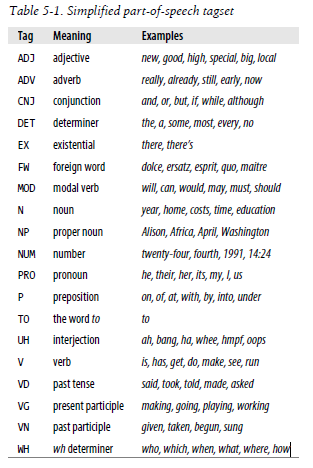

In [429]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

dict_keys(['AT', 'NP-TL', 'NN-TL', 'JJ-TL', 'VBD', 'NR', 'NN', 'IN', 'NP$', 'JJ', '``', "''", 'CS', 'DTI', 'NNS', '.', 'RBR', ',', 'WDT', 'HVD', 'VBZ', 'CC', 'IN-TL', 'BEDZ', 'VBN', 'NP', 'BEN', 'TO', 'VB', 'RB', 'DT', 'PPS', 'DOD', 'AP', 'BER', 'HV', 'DTS', 'VBG', 'PPO', 'QL', 'JJT', 'ABX', 'NN-HL', 'VBN-HL', 'WRB', 'CD', 'MD', 'BE', 'JJR', 'VBG-TL', 'BEZ', 'NN$-TL', 'HVZ', 'ABN', 'PN', 'PPSS', 'PP$', 'DO', 'NN$', 'NNS-HL', 'WPS', '*', 'EX', 'VB-HL', ':', '(', ')', 'NNS-TL', 'NPS', 'JJS', 'RP', '--', 'BED', 'OD', 'BEG', 'AT-HL', 'VBG-HL', 'AT-TL', 'PPL', 'DOZ', 'NP-HL', 'NR$', 'DOD*', 'BEDZ*', ',-HL', 'CC-TL', 'MD*', 'NNS$', 'PPSS+BER', "'", 'PPSS+BEM', 'CD-TL', 'RBT', '(-HL', ')-HL', 'MD-HL', 'VBZ-HL', 'IN-HL', 'JJ-HL', 'PPLS', 'CD-HL', 'WPO', 'JJS-TL', 'ABL', 'BER-HL', 'PPS+HVZ', 'VBD-HL', 'RP-HL', 'MD*-HL', 'AP-HL', 'CS-HL', 'DT$', 'HVN', 'FW-IN', 'FW-DT', 'VBN-TL', 'NR-TL', 'NNS$-TL', 'FW-NN', 'HVG', 'DTX', 'OD-TL', 'BEM', 'RB-HL', 'PPSS+MD', 'NPS-HL', 'NPS$', 'WP$', 'NN-TL-HL', '

In [430]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
list(nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1] == 'N'))

[]

In [432]:
wsj = nltk.corpus.treebank.tagged_words()
word_tag_fd = nltk.FreqDist(wsj)
[word + "/" + tag for (word, tag) in word_tag_fd if tag.startswith('V')]

['join/VB',
 'is/VBZ',
 'publishing/VBG',
 'was/VBD',
 'named/VBN',
 'used/VBN',
 'make/VB',
 'has/VBZ',
 'caused/VBN',
 'exposed/VBN',
 'reported/VBD',
 'enters/VBZ',
 'causing/VBG',
 'show/VBP',
 'said/VBD',
 'makes/VBZ',
 'stopped/VBD',
 'using/VBG',
 'were/VBD',
 'reported/VBN',
 'appear/VBP',
 'bring/VB',
 "'re/VBP",
 'talking/VBG',
 'heard/VBD',
 'having/VBG',
 'studied/VBD',
 'have/VBP',
 'are/VBP',
 'led/VBD',
 'making/VBG',
 'replaced/VBN',
 'sold/VBN',
 'worked/VBD',
 'died/VBN',
 'expected/VBN',
 'surviving/VBG',
 'including/VBG',
 'diagnosed/VBN',
 'study/VBP',
 'appears/VBZ',
 'be/VB',
 'studied/VBN',
 'industrialized/VBN',
 'owned/VBN',
 'support/VB',
 'argue/VBP',
 'regulate/VB',
 'found/VBN',
 'does/VBZ',
 'have/VB',
 'classified/VBN',
 'according/VBG',
 'rejected/VBN',
 'explained/VBD',
 'imposed/VBD',
 'remaining/VBG',
 'outlawed/VBN',
 'made/VBD',
 'dumped/VBD',
 'imported/VBN',
 'poured/VBD',
 'mixed/VBD',
 'described/VBD',
 'hung/VBD',
 'ventilated/VBD',
 "'s/VBZ",

In [433]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].keys()

dict_keys(['NN', 'VB'])

In [434]:
cfd1['cut'].keys()

dict_keys(['VBD', 'VB', 'VBN', 'NN'])

In [438]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
sorted(cfd2['VBN'].keys())

['Absorbed',
 'Annualized',
 'Asked',
 'Concerned',
 'Confronted',
 'Continued',
 'Developed',
 'Estimated',
 'Filmed',
 'Founded',
 'Funded',
 'Given',
 'Guaranteed',
 'Left',
 'Named',
 'OFFERED',
 'Posted',
 'Provided',
 'Put',
 'Rated',
 'Reached',
 'Regarded',
 'Rekindled',
 'Related',
 'Stung',
 'UPHELD',
 'Used',
 'abandoned',
 'absorbed',
 'accelerated',
 'accepted',
 'accounted',
 'accrued',
 'accumulated',
 'accused',
 'achieved',
 'acquired',
 'added',
 'adjusted',
 'adopted',
 'advanced',
 'advertised',
 'advised',
 'afflicted',
 'agreed',
 'aimed',
 'alarmed',
 'alienated',
 'alleged',
 'allocated',
 'allowed',
 'altered',
 'amended',
 'announced',
 'answered',
 'anticipated',
 'applied',
 'appointed',
 'appropriated',
 'approved',
 'argued',
 'armed',
 'arrested',
 'asked',
 'assembled',
 'assessed',
 'assigned',
 'assisted',
 'associated',
 'assumed',
 'assured',
 'attached',
 'attempted',
 'attracted',
 'attributed',
 'auctioned',
 'automated',
 'averted',
 'awarded',
 

In [439]:
[w for w in cfd1.conditions() if 'VD' in cfd1[w] and 'VN' in cfd1[w]]

[]

In [464]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text if tag.startswith(tag_prefix))
    return dict((tag, list(cfd[tag].keys())[:5]) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
#for tag in sorted(tagdict):
    #print (tag, tagdict[tag])
tagdict

{'NN': ['investigation', 'primary', 'election', 'evidence', 'place'],
 'NN$': ["ordinary's", "court's", "mayor's", "wife's", "governor's"],
 'NN$-HL': ["Golf's", "Navy's"],
 'NN$-TL': ["Department's",
  "Commissioner's",
  "President's",
  "Party's",
  "Mayor's"],
 'NN-HL': ['Merger', 'jail', 'Construction', 'fund', 'sp.'],
 'NN-NC': ['ova', 'eva', 'aya'],
 'NN-TL': ['County', 'Jury', 'City', 'Committee', 'Court'],
 'NN-TL-HL': ['Mayor', 'Commissioner', 'City', 'Oak', 'Grove'],
 'NNS': ['irregularities', 'presentments', 'thanks', 'reports', 'voters'],
 'NNS$': ["taxpayers'", "children's", "members'", "women's", "years'"],
 'NNS$-HL': ["Dealers'", "Idols'"],
 'NNS$-TL': ["States'", "Women's", "Princes'", "Bombers'", "Falcons'"],
 'NNS-HL': ['Wards', 'deputies', 'bonds', 'aspects', 'Decisions'],
 'NNS-TL': ['Police', 'Roads', 'Legislatures', 'Bankers', 'Reps.'],
 'NNS-TL-HL': ['Nations']}

##### Exploring Tagged Corpora

In [470]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [471]:
brown_lrnd_tagged = brown.tagged_words(categories='learned')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VBN  VB VBD  JJ  IN  QL   ,  CS  RB  AP VBG  RP VBZ QLP BEN WRB   .  TO  HV 
 15  10   8   5   4   3   3   3   3   1   1   1   1   1   1   1   1   1   1 


In [472]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print (w1, w2, w3)

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

equipped to handle
pulled to clear
Tend to make
progresses to insure
Endeavor to get
used to separate
used to separate
seems to know
wanted to trot
likes to trot
wants to trot
started to pace
starting to go
expected to race
designed to push
looks to run
began to motor
trained to drag
fled to make
seemed to know
used to say
preferred to get
hope to cover
want to miss
scheduled to vanish
vanish to make
continued to live
seem to cascade
forget to buy
fail to shorten
intend to cook
sized to fit
continue to release
wish to create
trim to fit
cut to fit
help to prevent
designed to take
used to transport
want to buy
used to fasten
help to keep
needed to build
designed to accommodate
adjusted to suit
used to cut
want to avoid
agreed to take
planned to destroy
allowed to issue
managed to coerce
want to know
planning to bring
urged to keep
come to swim
enjoined to look
prepared to cope
want to make
allowed to dry
pays to buy
want to play
expected to last
plan to add
want to start
plan to buy
goi

help to dispel
trained to describe
daring to abandon
seem to resemble
appears to lie
tend to persist
tried to describe
like to call
began to speak
try to say
attempting to make
attempt to answer
wanted to know
designed to enhance
intended to provide
continue to suffer
serves to make
fails to reach
beginning to crack
drawn to join
made to bite
forbidden to swing
seemed to hear
hired to drive
try to work
forbidden to love
made to represent
starts to ride
tries to stop
begins to gather
brought to pass
tends to reflect
tended to stratify
chosen to use
used to mean
forced to respond
tends to lose
tends to express
made to integrate
try to get
attempted to restrain
wished to continue
failed to flourish
propose to go
wished to segregate
liked to fancy
Deciding to become
strove to see
used to play
returned to live
proceeded to find
likes to catch
seems to care
intends to save
compelled to find
wishes to continue
ceasing to write
stops to ask
expected to fulfill
tailored to meet
want to say
want

hope to win
began to talk
begins to take
decided to make
asked to give
formed to give
taken to link
put to use
use to pay
going to work
combine to provide
wish to serve
expected to increase
needed to maintain
needed to obtain
planned to maintain
needed to meet
proposed to authorize
decided to stop
scheduled to become
seek to assure
agrees to furnish
prepared to consider
prepared to act
prepared to act
required to cease
required to operate
designed to operate
permitted to operate
taken to minimize
permitted to operate
permitted to operate
permitted to operate
required to operate
required to afford
elect to use
required to file
required to file
elect to use
required to file
obligated to furnish
trained to read
made to assure
tend to create
rejoicing to remember
permitted to run
came to work
decided to bring
found to permit
helping to strengthen
began to ship
believed to provide
designed to provide
expect to make
developed to facilitate
set to hold
continuing to carry
designed to increase

like to make
presume to speak
mean to live
made to look
designed to discover
seems to use
used to describe
postulated to explain
used to support
seem to corroborate
wants to hear
comes to represent
used to accompany
seems to symbolize
begins to appear
begins to ramble
help to set
calculated to put
decided to write
seemed to open
combine to create
learned to use
began to take
wanted to tell
wanted to substitute
want to make
come to determine
begun to ebb
intended to incorporate
led to postulate
hope to discover
tended to emphasize
fails to explore
seeks to make
helping to define
trying to avoid
trying to get
made to symbolize
kneels to kiss
serve to travesty
used to equate
altered to show
altered to show
taken to branch
attempt to execute
used to name
used to name
used to generate
used to select
used to select
used to specify
used to specify
expected to serve
used to eliminate
designed to handle
made to take
tended to float
began to decrease
began to build
used to provide
tend to ensure

opened to sell
required to assume
want to make
got to hold
want to inquire
seemed to spend
preoccupied to cook
asked to speak
pacing to stare
wished to make
began to build
needed to carry
meaning to live
agreed to help
agreed to take
contract to let
refused to believe
meant to invade
going to turn
got to intercept
permitted to go
failed to anticipate
needed to make
use to make
help to repel
seems to shield
pretending to sleep
threatening to report
seem to concentrate
want to give
trying to pull
adjusted to operate
like to see
bent to observe
forced to accompany
fear to tread
programed to compute
remember to program
directed to develop
schooled to examine
appeared to require
encouraged to develop
remembered to introduce
guided to make
tried to run
tried to tell
tried to ask
want to ask
going to come
going to happen
going to happen
going to take
inclined to think
manage to follow
wanting to tell
tried to write
exhausted to stay
afford to lose
afford to pay
used to work
going to give
bega

In [478]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)

for word in data.conditions():
    if len(data[word]) > 3:
        tags = data[word].keys()
        print (word, ' '.join(tags))

that ADP PRON DET ADV
best ADJ ADV VERB NOUN
present ADJ ADV NOUN VERB
close NOUN ADJ ADV VERB
open ADJ ADV VERB NOUN


##### Mapping Words to Properties Using Python Dictionaries

In [488]:
pos = {}
pos['colorless'] = 'ADJ'
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
#pos

#len(pos)
#sorted(pos)
#[w for w in pos if w.endswith('s')]
for word in sorted(pos):
    print (word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [489]:
pos.keys()
pos.values()

dict_values(['ADJ', 'N', 'V', 'ADV'])

In [490]:
pos.items()


dict_items([('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')])

In [491]:
for key, val in sorted(pos.items()):
    print (key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [494]:
counts = nltk.defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news'):
    counts[tag] += 1

In [496]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NN', 13162),
 ('IN', 10616),
 ('AT', 8893),
 ('NP', 6866),
 (',', 5133),
 ('NNS', 5066),
 ('.', 4452),
 ('JJ', 4392),
 ('CC', 2664),
 ('VBD', 2524),
 ('NN-TL', 2486),
 ('VB', 2440),
 ('VBN', 2269),
 ('RB', 2166),
 ('CD', 2020),
 ('CS', 1509),
 ('VBG', 1398),
 ('TO', 1237),
 ('PPS', 1056),
 ('PP$', 1051),
 ('MD', 1031),
 ('AP', 923),
 ('NP-TL', 741),
 ('``', 732),
 ('BEZ', 730),
 ('BEDZ', 716),
 ("''", 702),
 ('JJ-TL', 689),
 ('PPSS', 602),
 ('DT', 589),
 ('BE', 525),
 ('VBZ', 519),
 ('NR', 495),
 ('RP', 482),
 ('QL', 468),
 ('PPO', 412),
 ('WPS', 395),
 ('NNS-TL', 344),
 ('WDT', 343),
 ('BER', 328),
 ('WRB', 328),
 ('OD', 309),
 ('HVZ', 301),
 ('--', 300),
 ('NP$', 279),
 ('HV', 265),
 ('HVD', 262),
 ('*', 256),
 ('BED', 252),
 ('NPS', 215),
 ('BEN', 212),
 ('NN$', 210),
 ('DTI', 205),
 ('NP-HL', 186),
 ('ABN', 183),
 ('NN-HL', 171),
 ('IN-TL', 164),
 ('EX', 161),
 (')', 151),
 ('(', 148),
 ('JJR', 145),
 (':', 137),
 ('DTS', 136),
 ('JJT', 100),
 ('CD-TL', 96),
 ('NNS-HL', 92),
 ('

In [497]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NN',
 'IN',
 'AT',
 'NP',
 ',',
 'NNS',
 '.',
 'JJ',
 'CC',
 'VBD',
 'NN-TL',
 'VB',
 'VBN',
 'RB',
 'CD',
 'CS',
 'VBG',
 'TO',
 'PPS',
 'PP$',
 'MD',
 'AP',
 'NP-TL',
 '``',
 'BEZ',
 'BEDZ',
 "''",
 'JJ-TL',
 'PPSS',
 'DT',
 'BE',
 'VBZ',
 'NR',
 'RP',
 'QL',
 'PPO',
 'WPS',
 'NNS-TL',
 'WDT',
 'BER',
 'WRB',
 'OD',
 'HVZ',
 '--',
 'NP$',
 'HV',
 'HVD',
 '*',
 'BED',
 'NPS',
 'BEN',
 'NN$',
 'DTI',
 'NP-HL',
 'ABN',
 'NN-HL',
 'IN-TL',
 'EX',
 ')',
 '(',
 'JJR',
 ':',
 'DTS',
 'JJT',
 'CD-TL',
 'NNS-HL',
 'PN',
 'RBR',
 'VBN-TL',
 'ABX',
 'NN$-TL',
 'IN-HL',
 'DOD',
 'DO',
 'BEG',
 ',-HL',
 'VBN-HL',
 'AT-TL',
 'NNS$',
 'CD-HL',
 'JJS',
 'CC-TL',
 "'",
 'JJ-HL',
 'MD*',
 'VBZ-HL',
 'PPL',
 'PPSS+MD',
 'PPS+BEZ',
 'OD-TL',
 'DOZ',
 'VB-HL',
 'NR$',
 'FW-NN',
 'WP$',
 'PPLS',
 'ABL',
 'PPSS+BER',
 '(-HL',
 ')-HL',
 'NNS$-TL',
 '.-HL',
 'PPSS+HV',
 'PPSS+BEM',
 'HVN',
 'NPS$',
 'DO*',
 'FW-NN-TL',
 'VBG-TL',
 'DOD*',
 'RB-HL',
 'NPS-TL',
 'AT-HL',
 'FW-IN',
 'NR-TL',
 'HVG',
 'BEM',
 

##### Last Letters

In [499]:
last_letters = nltk.defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
    
last_letters['ly']

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [500]:
last_letters['zy']

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

##### Anagrams

In [501]:
anagrams = nltk.defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
    
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [502]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [506]:
pos = nltk.defaultdict(lambda: nltk.defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

pos[('DET', 'right')]

defaultdict(int, {'ADJ': 11, 'NOUN': 5})

##### Inverting a dictionnary

In [508]:
counts = nltk.defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

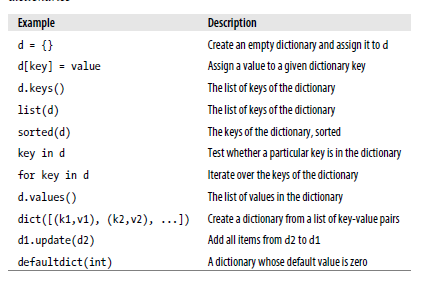

###### Automatic tagging

In [509]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [510]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [511]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [513]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

##### The Regular Expression Tagger

In [514]:
patterns = [
(r'.*ing$', 'VBG'), # gerunds
(r'.*ed$', 'VBD'), # simple past
(r'.*es$', 'VBZ'), # 3rd singular present
(r'.*ould$', 'MD'), # modals
(r'.*\'s$', 'NN$'), # possessive nouns
(r'.*s$', 'NNS'), # plural nouns
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
(r'.*', 'NN') # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [515]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

##### The Lookup Tagger

In [517]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.3329355371243312

In [519]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', 'RB'),
 ('a', 'AT'),
 ('relative', 'JJ'),
 ('handful', 'NN'),
 ('of', 'IN'),
 ('such', 'JJ'),
 ('reports', 'NNS'),
 ('was', 'BEDZ'),
 ('received', 'VBD'),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', 'NN'),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', 'IN'),
 ('the', 'AT'),
 ('widespread', 'JJ'),
 ('interest', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('the', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('voters', 'NNS'),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', 'NN'),
 ("''", "''"),
 ('.', '.')]

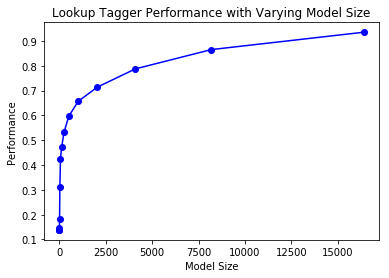

In [520]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()

##### N-Gram Tagging

In [5]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [6]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

##### Separating the Training and Testing Data

In [7]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [8]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

##### General N-Gram Tagging

In [9]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [10]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [11]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

##### Combining Taggers

In [12]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

##### Tagging Unknown Words

###### Storing Taggers

In [13]:
import cloudpickle
from cloudpickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [15]:
from cloudpickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [16]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

##### Performance Limitations

In [17]:
cfd = nltk.ConditionalFreqDist(((x[1], y[1], z[0]), z[1]) for sent in brown_tagged_sents for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

##### Confusion Matrix

In [19]:
test_tags = [tag for sent in brown.sents(categories='editorial')for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print (nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### Tagging Across Sentence Boundaries

In [20]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

##### Transformation-Based Tagging

In [31]:
from nltk.tbl import demo as brill_tagger
brill_tagger.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  